In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats

### Power calculation and effect size

The aim of power calculation is to determine what should be the size of the sample in a experiment so that it will be very likely to dettect a target difference between the treatment and the control group if that difference actually exists. That target difference between the treatment and control populations is the effect size. A power of 80%-90% is a good trade-off between a high likelihood of detecting the effect size in the experiment and not having to expose too many subjects to an experimental treatment.

In this first example, we demonstrate how to compute the power of an experiment given a target effect size, a sample size and a significance level. Let's first define the problem. Let's assume that we are conducting an experiment in which we are trying to determine whether not using electronic devices in bed just before sleeping increases the quality of sleep of teenagers. We do this by measuring the hours of deep sleep in two groups of subjects: a treatment group in which subjects do not use any electronic device in bed and a control group that spends half an hour in bed using their phones for messaging, browsing the internet, etc. The subjects are randomly chosen from the population of teenagers in a given area and randomly assigned to groups.  

In [2]:
# Mean, standard deviation and number of observations in the first sample
MEAN_TREATMENT = 3.7
STD_TREATMENT = 1.3
N_TREATMENT = 20
# Mean, standard deviation and number of observations in the second sample
MEAN_CONTROL = 3.1
STD_CONTROL = 1.7
N_CONTROL = 20
# Significance level
SL = 0.05

- Null hypothesis: the difference between the treatment and the control group is zero hours
- Alternate hypothesis: the difference between the treatment and the control group is one hour

This one hour is the effect size of interest for which we are aiming at having a large likelihood of detecting, if such difference really exists between the two groups.

In [3]:
# Computing the standard error for a two-sample t test
se = math.sqrt(STD_TREATMENT**2/N_TREATMENT + STD_CONTROL**2/N_CONTROL)
print(se)

0.4785394445602159


0.787127341024


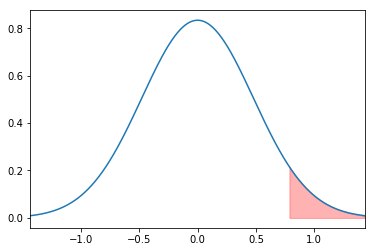

In [4]:
# Plotting the normal distribution corresponding to the null distribution (the mean
# is the value of the null hypothesis, and the standard deviation is equal to the 
# standard error) and the rejection area
x = np.arange(-3*se, 3*se, 6*se/1000)
y = scipy.stats.norm(scale=se).pdf(x)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim([-3*se, 3*se])

# From which value do we reject the null hypothesis?
z_score = scipy.stats.norm.ppf(1-SL)
x_rejection = z_score*se # I would get the same value if I used scipy.stats.norm(scale=se).ppf(1-SL)
x = np.arange(x_rejection, 3*se, 6*se/1000)
y = scipy.stats.norm(scale=se).pdf(x)
ax.fill_between(x, 0, y, color='red', alpha=0.3)
print(x_rejection)

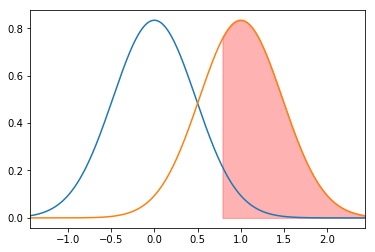

In [5]:
# We overlap with an alternative distribution which mean is the desired effect size and
# standard deviation is the standard error
lim_x = [min(1-3*se,-3*se), max(1+3*se, 3*se)]

x = np.arange(lim_x[0], lim_x[1], 6*se/1000)
y1 = scipy.stats.norm(scale=se).pdf(x)
y2 = scipy.stats.norm(loc=1,scale=se).pdf(x)

fig, ax = plt.subplots()
ax.plot(x,y1)
ax.plot(x,y2)
ax.set_xlim(lim_x)

# Plotting how much of th second distribution overlaps
# with the first distribution
z_score = scipy.stats.norm.ppf(1-SL)
x_rejection = z_score*se
x = np.arange(x_rejection, lim_x[1], 6*se/1000)
y = scipy.stats.norm(loc=1, scale=se).pdf(x)
ax.fill_between(x, 0, y, color='red', alpha=0.3)

In [6]:
# The power value corresponds to the area of the second distribution that overlaps with the rejection
# area of the first distribution
power = 1 - scipy.stats.norm(loc=1, scale=se).cdf(x_rejection)
print(power)

0.671781682449


### What sample size should we choose?

What should be the size of the sample if we are aiming at having a 80% power?

The distance from the first distribution to the rejection area is SE x z1, where z1 is the z value of the rejection area. 

The distance from the second distribution to the rejection area is SE x z2, where z2 is the z value that would result in a 80% power value

In [7]:
z1 = scipy.stats.norm.ppf(1-SL)
z2 = abs(scipy.stats.norm.ppf(0.8))
print('z1 = ' + str(z1))
print('z2 = ' + str(z2))

z1 = 1.64485362695
z2 = 0.841621233573


Now we equal SE x z1 + SE x z2 to the effect size (i.e. 1) and find the SE value:

SE(z1 + z2) = 1

SE = 1/(z1+z2)

In [8]:
new_se = 1/(z1 + z2)
print(new_se)

0.40217579348


Finally, we use the standard error equation to find the value of N, where N is the number of observations in both the first and the second sample. We are asuming the same number of observations in each sample. 

se = math.sqrt(STD_TREATMENT\*\*2/N + STD_CONTROL\*\*2/N)

se\*\*2 = STD_TREATMENT\*\*2/N + STD_CONTROL\*\*2/N

N\*se\*\*2 = STD_TREATMENT\*\*2 + STD_CONTROL\*\*2

N = (STD_TREATMENT\*\*2 + STD_CONTROL\*\*2)/se\*\*2

In [9]:
N = (STD_TREATMENT**2 + STD_CONTROL**2)/new_se**2
print(N)

28.3161121227


Let's repeat the power calculation process, using the calculated N value, to make sure that the power value is now 80%

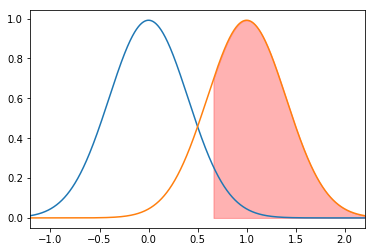

In [10]:
# We overlap with an alternative distribution which mean is the desired effect size and
# standard deviation is the standard error
lim_x = [min(1-3*new_se,-3*new_se), max(1+3*new_se, 3*new_se)]

x = np.arange(lim_x[0], lim_x[1], 6*new_se/1000)
y1 = scipy.stats.norm(scale=new_se).pdf(x)
y2 = scipy.stats.norm(loc=1,scale=new_se).pdf(x)

fig, ax = plt.subplots()
ax.plot(x,y1)
ax.plot(x,y2)
ax.set_xlim(lim_x)

# Plotting how much of th second distribution overlaps
# with the first distribution
z_score = scipy.stats.norm.ppf(1-SL)
x_rejection = z_score*new_se
x = np.arange(x_rejection, lim_x[1], 6*new_se/1000)
y = scipy.stats.norm(loc=1, scale=new_se).pdf(x)
ax.fill_between(x, 0, y, color='red', alpha=0.3)

In [11]:
# The power value corresponds to the area of the second distribution that overlaps with the rejection
# area of the first distribution
power = 1 - scipy.stats.norm(loc=1, scale=new_se).cdf(x_rejection)
print(power)

0.8
